In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the data into dataframe
data=pd.read_csv('music_genre.csv')
data=data.replace("?",np.nan)## Replacing ? present in the data with null values( Considering ? to be inconsistent)
data["tempo"]=pd.to_numeric(data["tempo"])

In [3]:
## Info about data types and the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [4]:
## Segregation of features into numerical & categorical features
numerical_columns=["instance_id","popularity","acousticness","danceability","duration_ms","energy","instrumentalness",
                  "liveness","loudness","speechiness","valence","tempo"]
categorical_colums=set(data.columns.to_list()) - set(data._get_numeric_data().columns.to_list())

In [5]:
# Statistical Summary of Numerical Features
summary_df_cont=pd.DataFrame()
for names in numerical_columns:
    temp_df=pd.DataFrame()
    temp_df["Feature"]= [names]
    temp_df["Count"]=[data[names].shape[0]]
    temp_df["% of Missing"]=[data[names].isnull().sum()]/temp_df["Count"]*100
    temp_df["Card."]= [data[names].nunique()] ## Cardinality of Feature
    temp_df["Min"]=[data[names].min()]
    temp_df["Q1"]=[data[names].quantile(0.25)]
    temp_df["Median"]=[data[names].quantile(0.5)]
    temp_df["Q3"]=[data[names].quantile(0.75)]
    temp_df["Max"]=[data[names].max()]
    temp_df["Mean"]=[data[names].mean()]
    temp_df["Std.Dev"]=[data[names].std()]
    summary_df_cont=pd.concat([summary_df_cont,temp_df])
    
    
summary_df_cont

Feature  Count  % of Missing  Card.           Min           Q1  \
0       instance_id  50005      0.009999  50000  20002.000000   37973.5000   
0        popularity  50005      0.009999     99      0.000000      34.0000   
0      acousticness  50005      0.009999   4193      0.000000       0.0200   
0      danceability  50005      0.009999   1088      0.059600       0.4420   
0       duration_ms  50005      0.009999  26028     -1.000000  174800.0000   
0            energy  50005      0.009999   2085      0.000792       0.4330   
0  instrumentalness  50005      0.009999   5131      0.000000       0.0000   
0          liveness  50005      0.009999   1646      0.009670       0.0969   
0          loudness  50005      0.009999  17247    -47.046000     -10.8600   
0       speechiness  50005      0.009999   1337      0.022300       0.0361   
0           valence  50005      0.009999   1615      0.000000       0.2570   
0             tempo  50005      9.969003  29393     34.347000      94.9415   

          Median             Q3          Max           Mean        Std.Dev  
0   55913.500000   73863.250000    91759.000   55888.396360   20725.256253  
0      45.000000      56.000000       99.000      44.220420      15.542008  
0       0.144000       0.552000        0.996       0.306383       0.341340  
0       0.568000       0.687000        0.986       0.558241       0.178632  
0  219281.000000  268612.250000  4830606.000  221252.602860  128671.957157  
0       0.643000       0.815000        0.999       0.599755       0.264559  
0       0.000158       0.155000        0.996       0.181601       0.325409  
0       0.126000       0.244000        1.000       0.193896       0.161637  
0      -7.276500      -5.173000        3.744      -9.133761       6.162990  
0       0.048900       0.098525        0.942       0.093586       0.101373  
0       0.448000       0.648000        0.992       0.456264       0.247119  
0     119.879000     140.471250      220.276     119.952961      30.641701

We will drop instance_id column, as it is just used as an identifier

In [6]:
# Satistical Summary of Categorical features
summary_df_cat=pd.DataFrame()
for names in categorical_colums:
    temp_df=pd.DataFrame()
    temp_df["Feature"]= [names]
    temp_df["Count"]=[data[names].shape[0]]
    temp_df["% of Missing"]=([data[names].isnull().sum()]/temp_df["Count"])*100
    temp_df["Card."]= [data[names].nunique()] ## Cardinality of feature
    temp_df["Mode"]=[data[names].mode(dropna=True)[0]]
    temp_df["Mode Freq"]=[(data[names]==temp_df["Mode"][0]).sum()]
    temp_df["Mode %"]=temp_df["Mode Freq"]/temp_df["Count"]*100
    temp_df["2nd Mode"]=[data[data[names]!=temp_df["Mode"][0]][names].mode(dropna=True)[0]]
    temp_df["2nd Mode Freq"]=[(data[names]==temp_df["2nd Mode"][0]).sum()]
    temp_df["2nd Mode %"]=temp_df["2nd Mode Freq"]/temp_df["Count"]*100
    summary_df_cat=pd.concat([summary_df_cat,temp_df])
    
    
    
summary_df_cat

Feature  Count  % of Missing  Card.         Mode  Mode Freq  \
0     track_name  50005      0.009999  41699         Home         16   
0    artist_name  50005      0.009999   6863  empty_field       2489   
0            key  50005      0.009999     12            G       5727   
0    music_genre  50005      0.009999     10  Alternative       5000   
0           mode  50005      0.009999      2        Major      32099   
0  obtained_date  50005      0.009999      5        4-Apr      44748   

      Mode %       2nd Mode  2nd Mode Freq  2nd Mode %  
0   0.031997        Forever             15    0.029997  
0   4.977502  Nobuo Uematsu            429    0.857914  
0  11.452855              C           5522   11.042896  
0   9.999000          Anime           5000    9.999000  
0  64.191581          Minor          17901   35.798420  
0  89.487051          3-Apr           4067    8.133187

In [7]:
data = data.dropna(axis=0, subset=['music_genre']) ## Dropping Rows where target has null values
data['music_genre'] = np.where(data["music_genre"]=='Electronic',1,0) ## Transformation of target variable into 0(Not Electronic) & 1(Electronic)

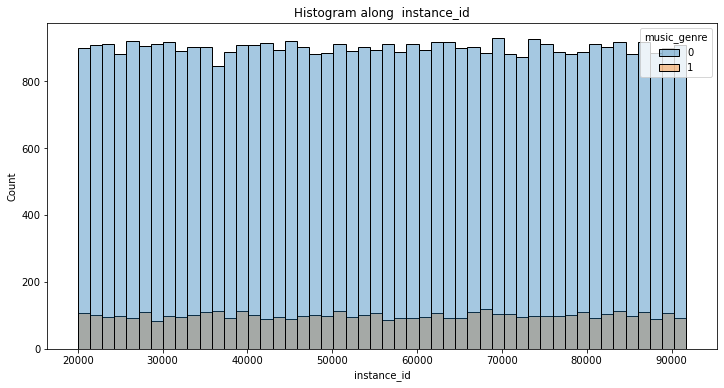

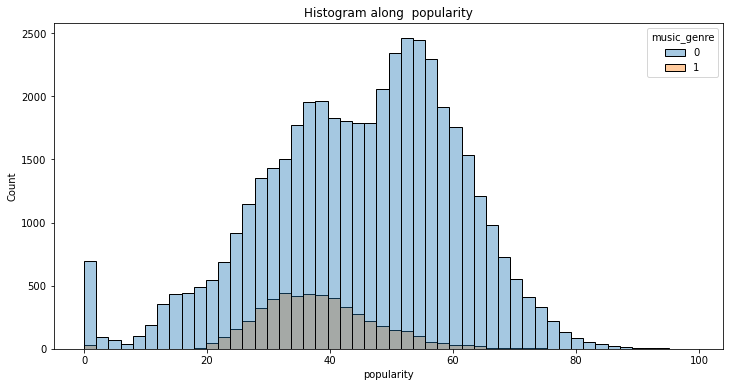

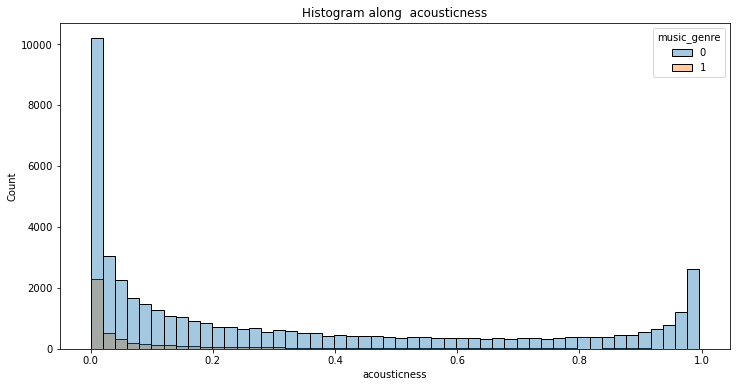

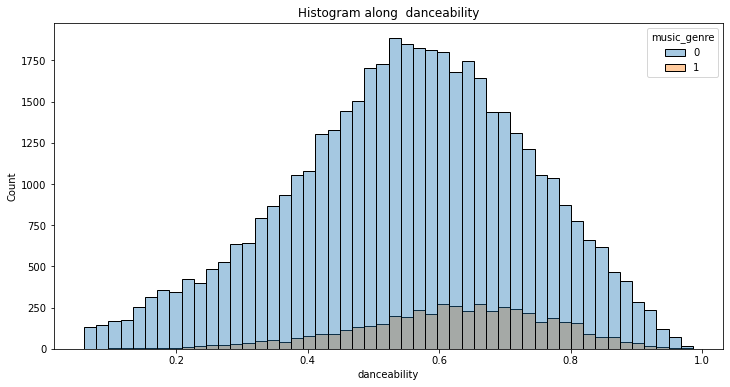

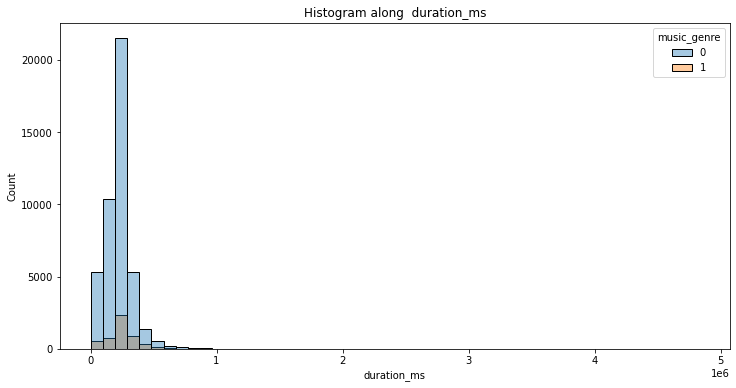

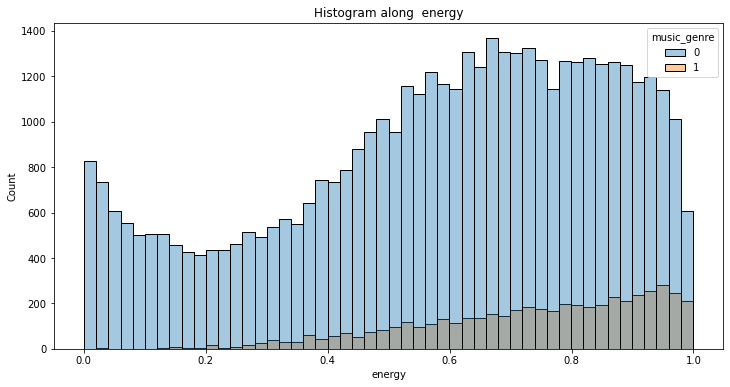

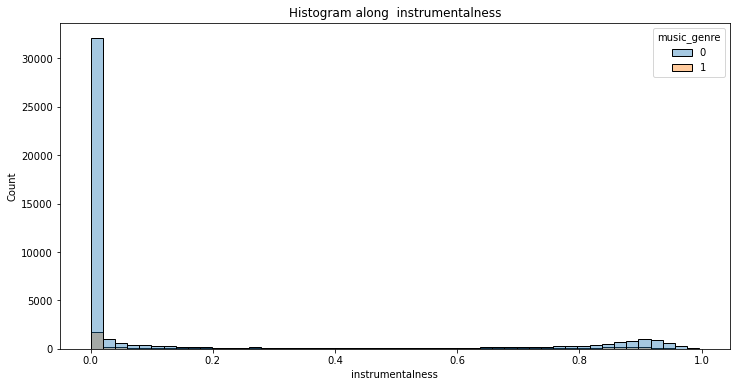

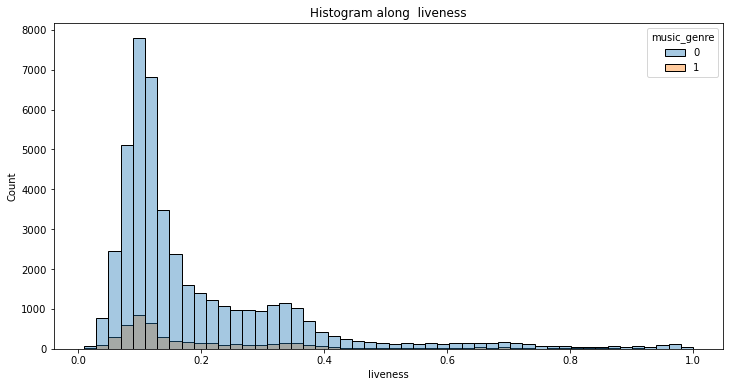

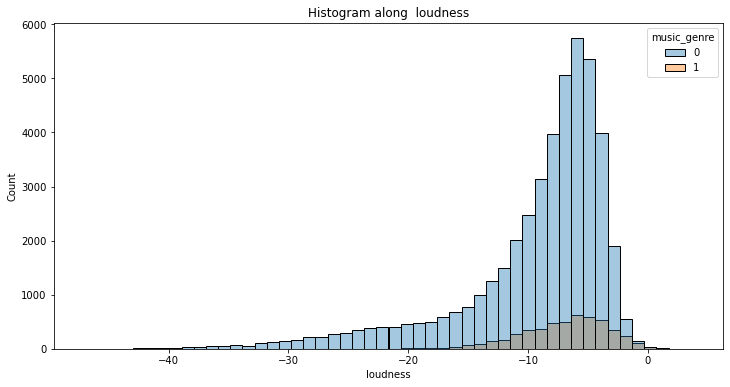

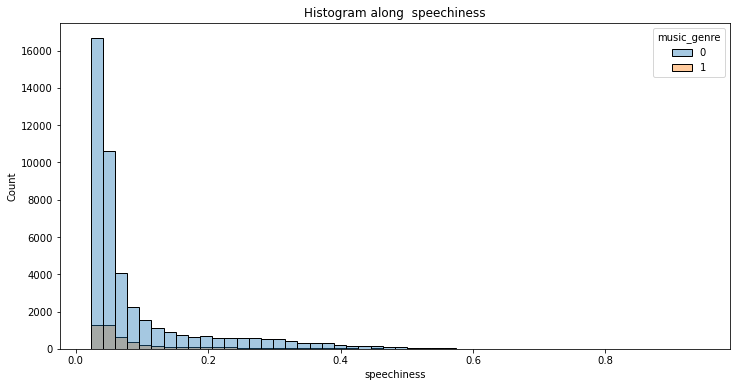

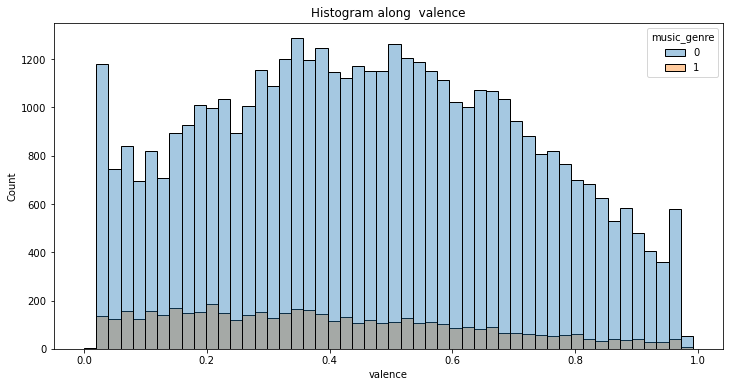

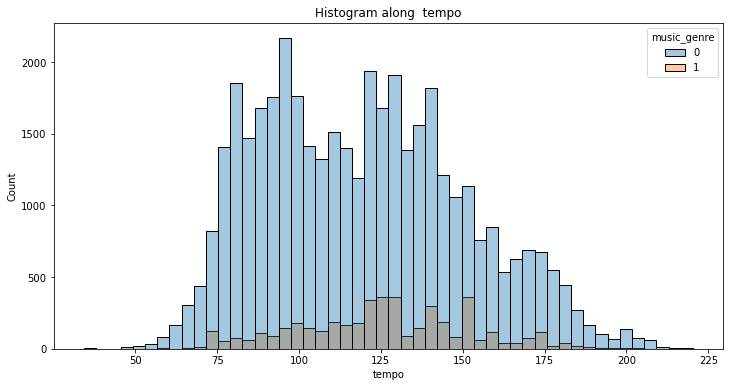

In [8]:
## Distribution Visualization for continous features
for name in numerical_columns:
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    sns.histplot(data=data, x=name, 
                 bins=50,hue='music_genre',alpha=0.4).set_title("Histogram along "+ " " + name)

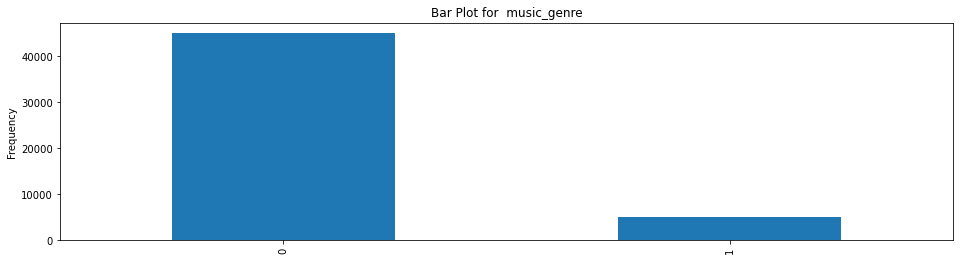

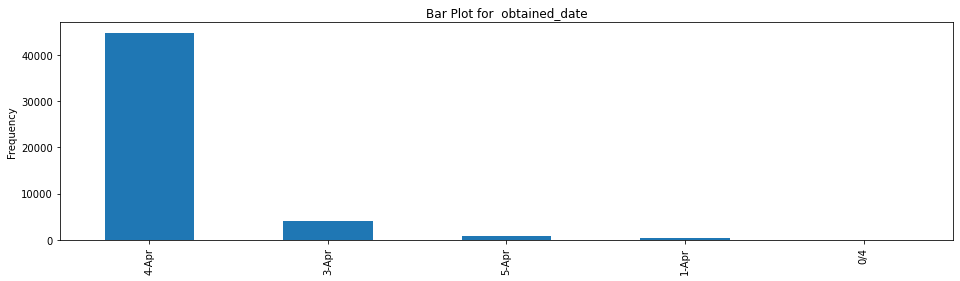

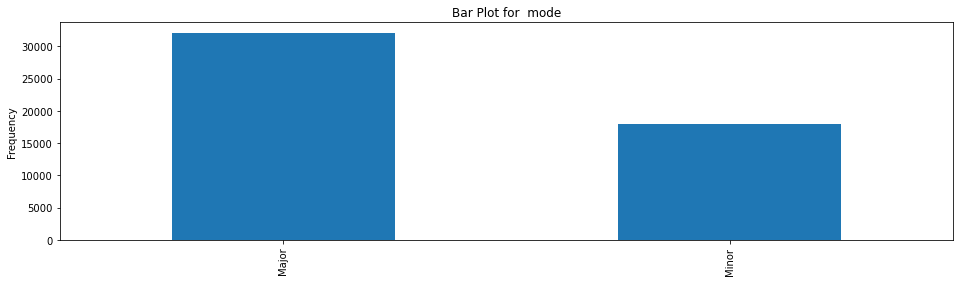

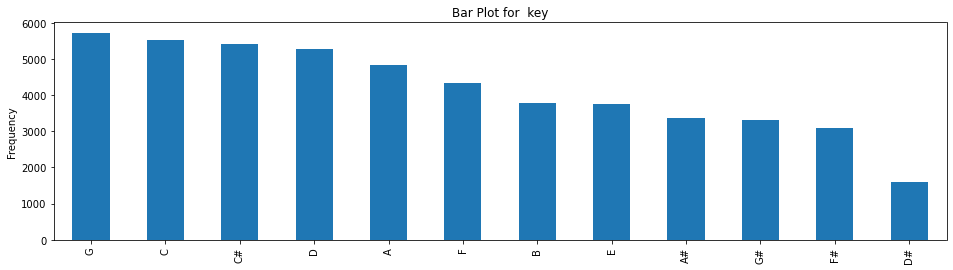

In [9]:
## Distributions for categorical features
for name in ["music_genre","obtained_date","mode","key"]:
    fig, ax = plt.subplots(1,1,figsize=(16,4))
    data[name].value_counts().plot(kind='bar',ax=ax,title="Bar Plot for "+ " " + name,ylabel="Frequency")

In [10]:
## Handling Missing values & Identifying outliers in the dataset
data.isnull().sum()
## Only tempo has Null values, we can use imputation to handle null values

instance_id            0
artist_name            0
track_name             0
popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
mode                   0
speechiness            0
tempo               4980
obtained_date          0
valence                0
music_genre            0
dtype: int64

In [11]:
## Mean Imputation
data["tempo"]=data["tempo"].fillna(data["tempo"].mean())

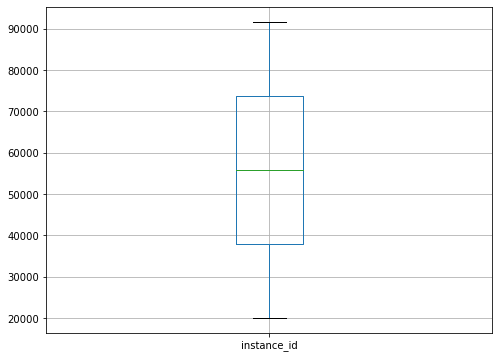

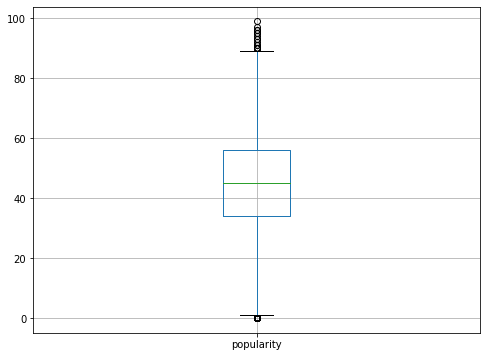

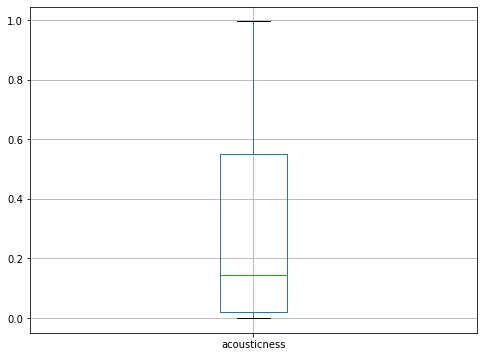

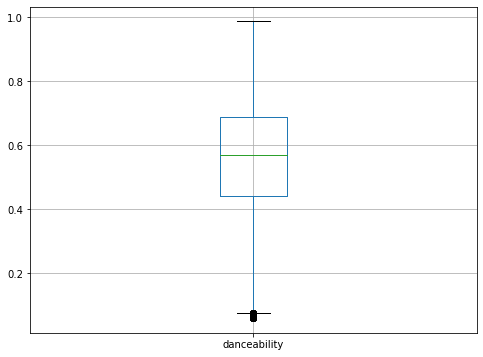

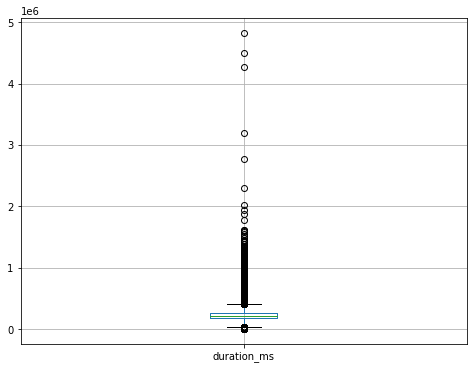

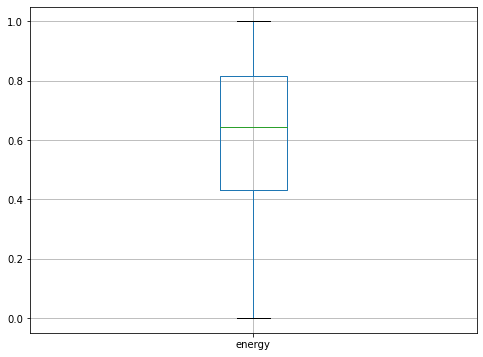

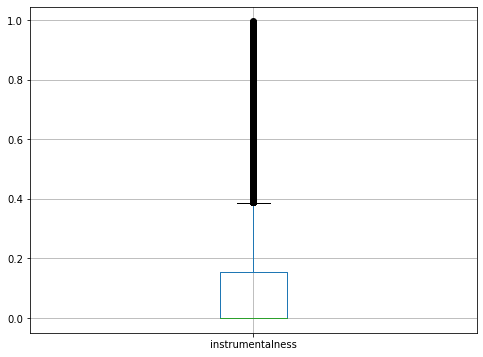

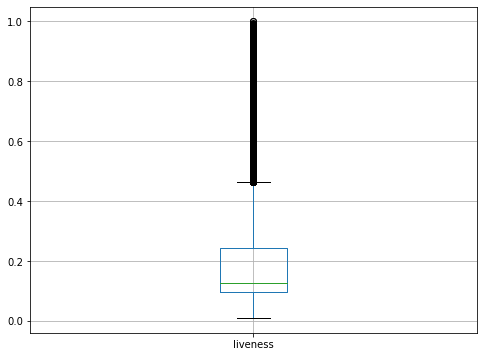

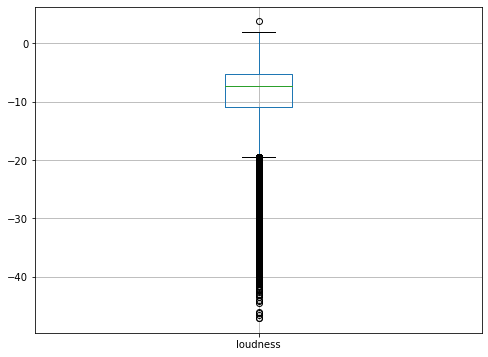

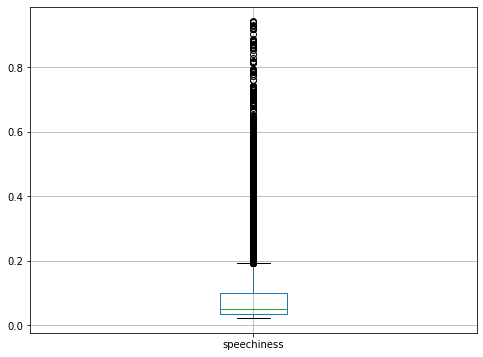

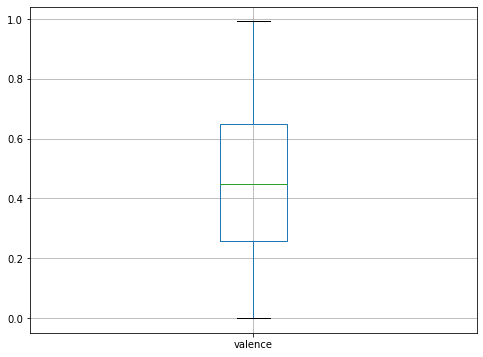

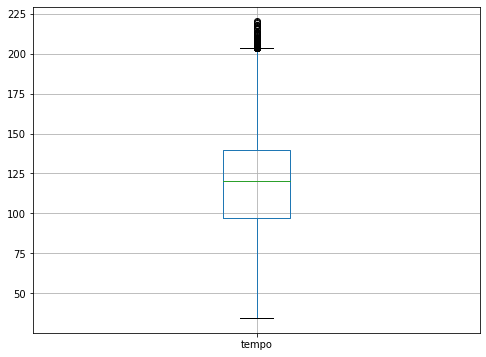

In [12]:
## Box Plots for outliers study
for name in numerical_columns:
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    data.boxplot(column=name,ax=ax)

In [13]:
## Removal of outliers using Interquartile range Range method. Clamping between (IQ1-1.5*IQR,IQ3+1.5*IQR)

for i in ["popularity","danceability","duration_ms","instrumentalness","liveness","loudness","speechiness","tempo"]:
    data[i]=data[i].clip(data[i].quantile(0.25)-
                                                 (1.5*(data[i].quantile(0.75)-
                                                       data[i].quantile(0.25))),
                                                       data[i].quantile(0.75)+
                                                 (1.5*(data[i].quantile(0.75)-
                                                       data[i].quantile(0.25))))
    
   



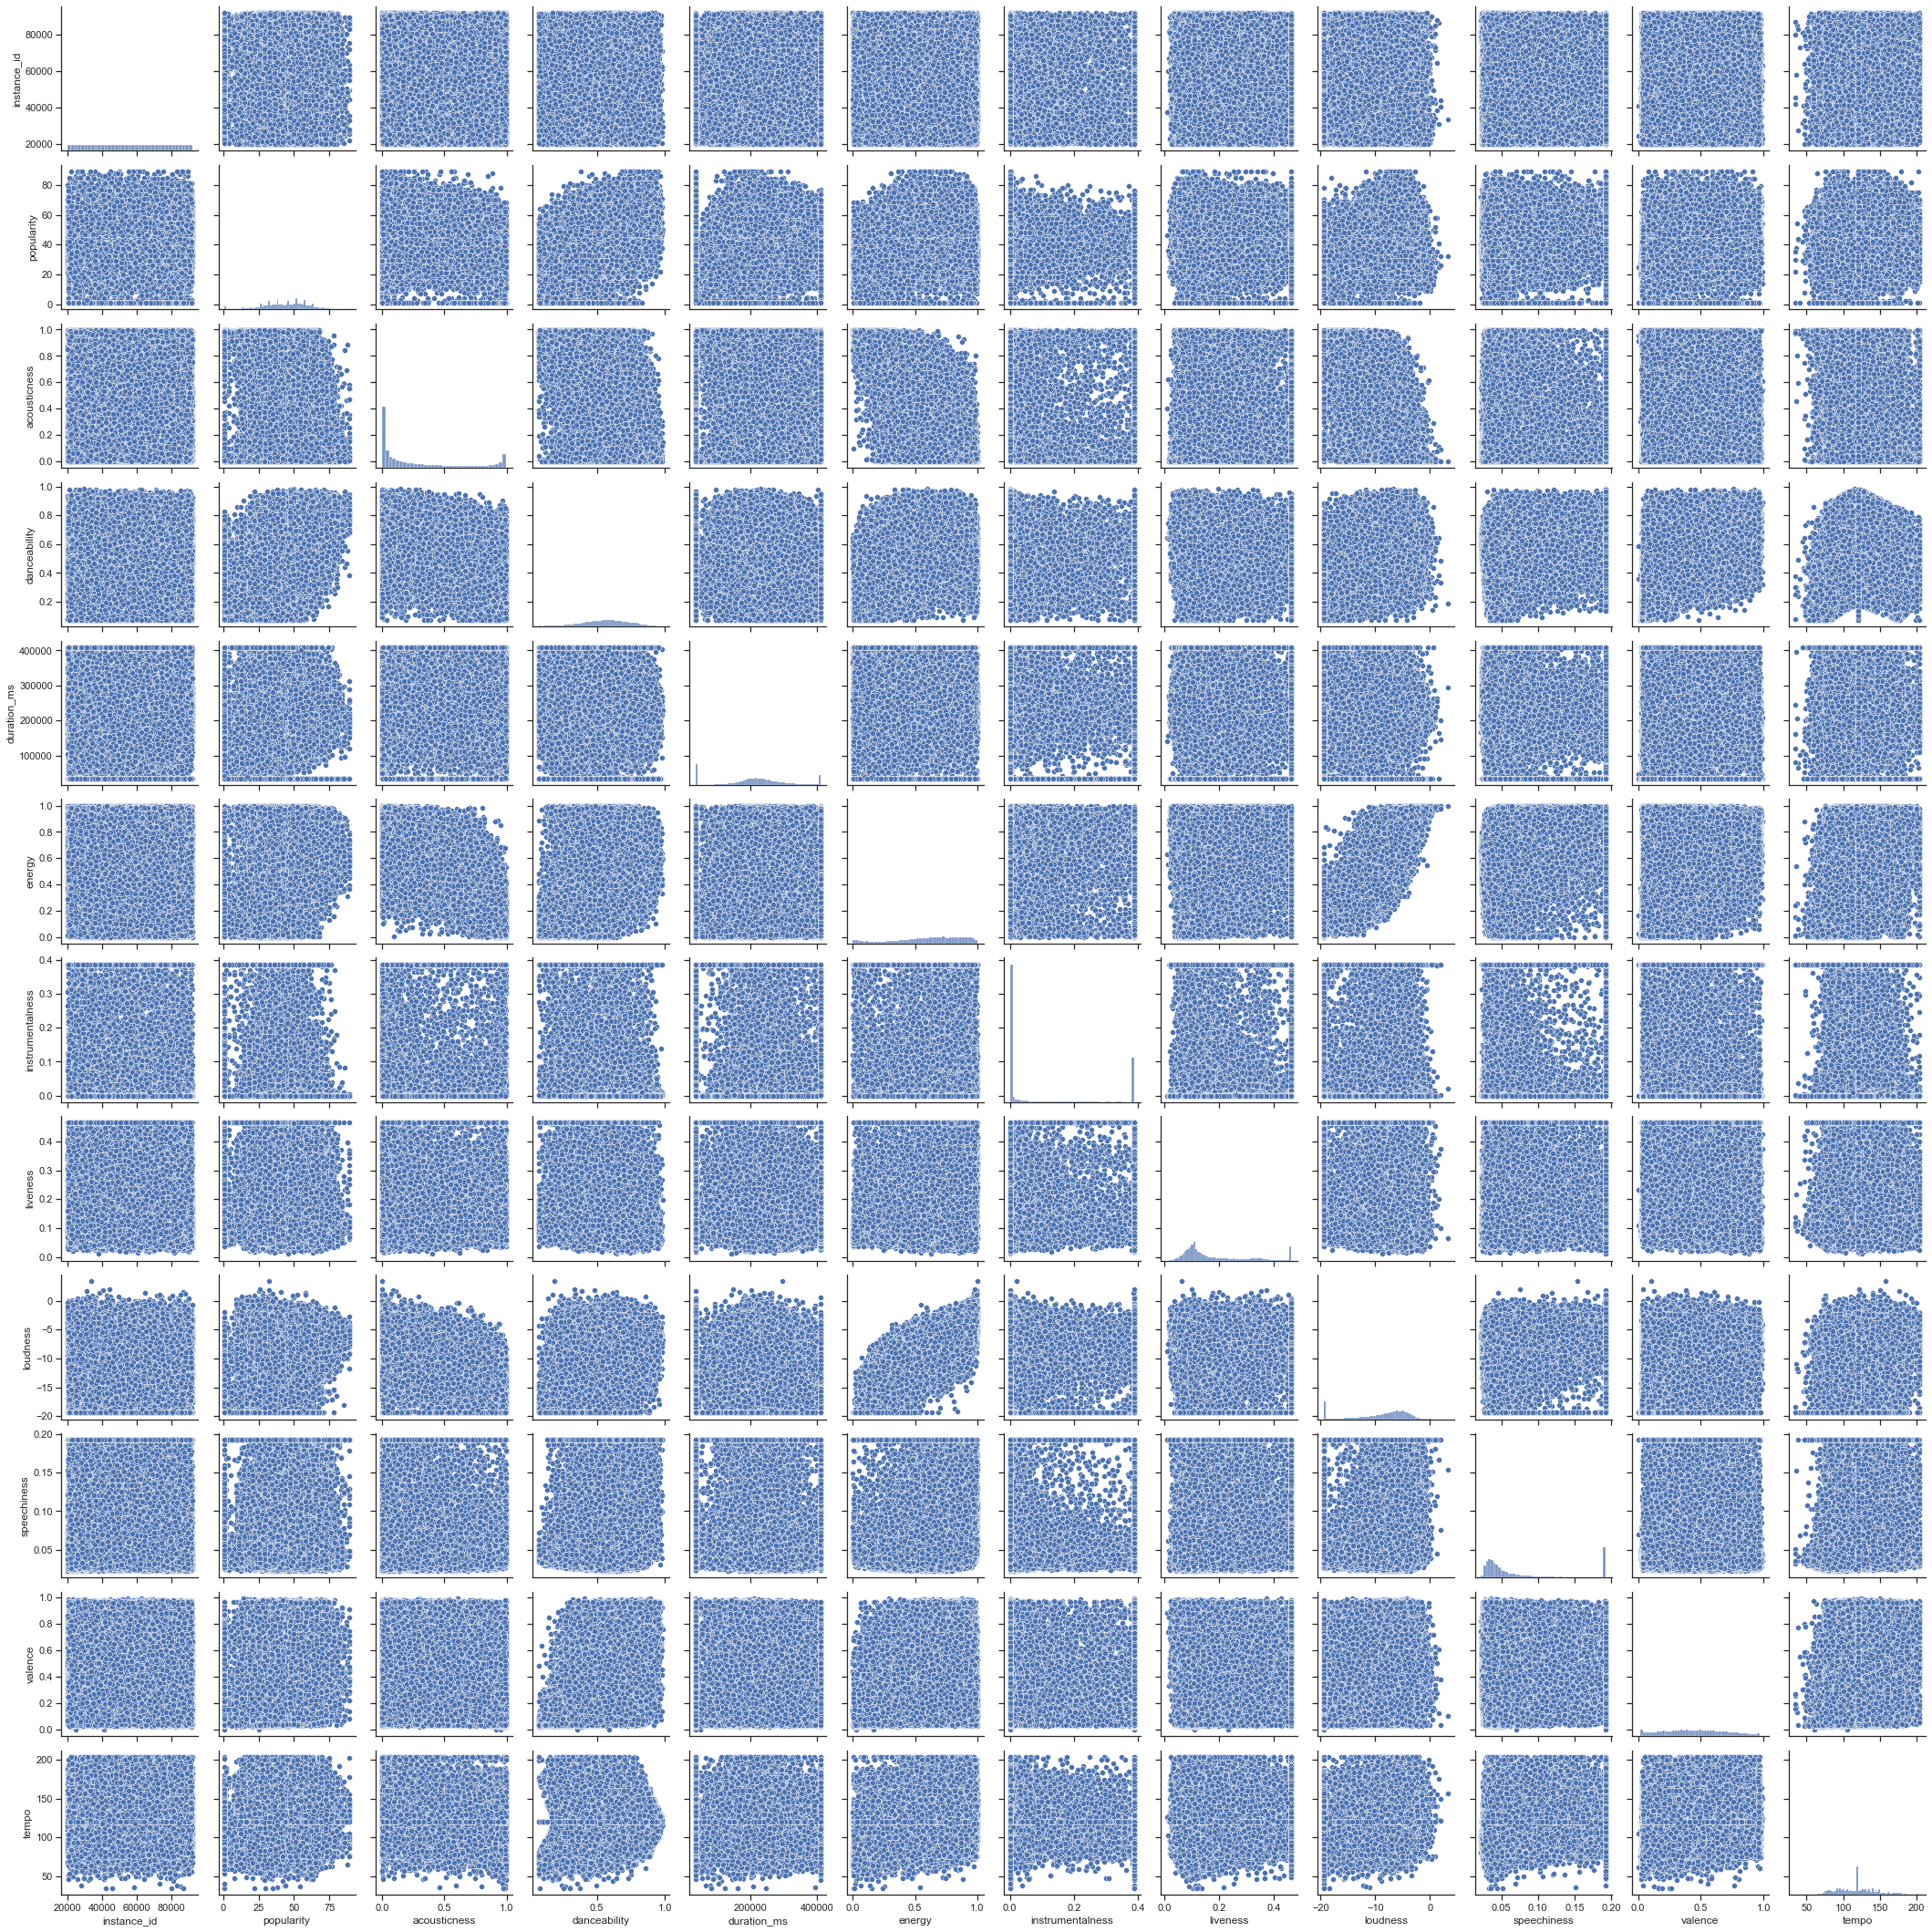

In [14]:
## Scatter Plots for continous features
sns.set_theme(style="ticks")
sns.pairplot(data[numerical_columns],kind="scatter")

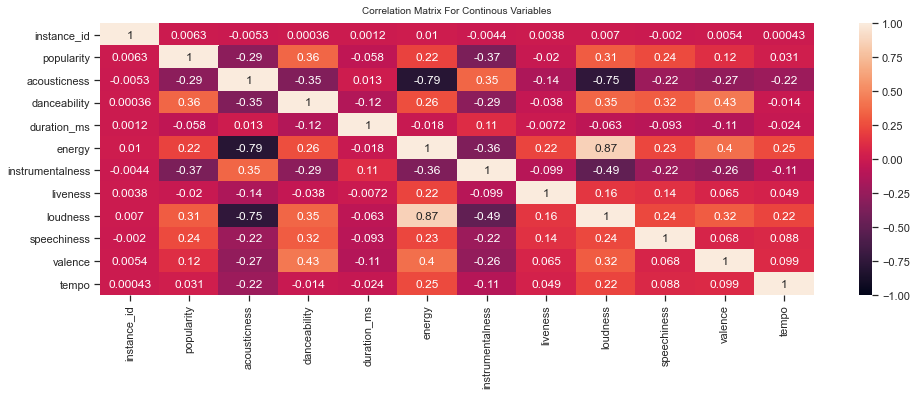

In [15]:
## Pearson correlation matrix for continous feature. We can use this to study relation between features
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(data[numerical_columns].corr(method="pearson"), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix For Continous Variables', fontdict={'fontsize':10}, pad=10);

In [16]:
## Feature Selection ; Dropping Instance_Id,artist_name,track_name
data_filtered=data.drop(columns=["instance_id","artist_name","track_name"])## Dropping Instance_ID, since it's a unique ID. Artist_name & track_name are categorical variables with High cardinality 

data_filtered

popularity  acousticness  danceability  duration_ms  energy  \
0            27.0       0.00468         0.652    34081.625   0.941   
1            31.0       0.01270         0.622   218293.000   0.890   
2            28.0       0.00306         0.620   215613.000   0.755   
3            34.0       0.02540         0.774   166875.000   0.700   
4            32.0       0.00465         0.638   222369.000   0.587   
...           ...           ...           ...          ...     ...   
50000        59.0       0.03340         0.913    34081.625   0.574   
50001        72.0       0.15700         0.709   251860.000   0.362   
50002        51.0       0.00597         0.693   189483.000   0.763   
50003        65.0       0.08310         0.782   262773.000   0.472   
50004        67.0       0.10200         0.862   267267.000   0.642   

       instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0               0.38750  A#   0.11500    -5.201  Minor     0.074800  100.889   
1               0.38750   D   0.12400    -7.043  Minor     0.030000  115.002   
2               0.01180  G#   0.46465    -4.617  Major     0.034500  127.994   
3               0.00253  C#   0.15700    -4.498  Major     0.192163  128.014   
4               0.38750  F#   0.15700    -6.266  Major     0.041300  145.036   
...                 ...  ..       ...       ...    ...          ...      ...   
50000           0.00000  C#   0.11900    -7.022  Major     0.192163   98.028   
50001           0.00000   B   0.10900    -9.814  Major     0.055000  122.043   
50002           0.00000   D   0.14300    -5.443  Major     0.146000  131.079   
50003           0.00000   G   0.10600    -5.016  Minor     0.044100   75.886   
50004           0.00000  F#   0.27200   -13.652  Minor     0.101000   99.201   

      obtained_date  valence  music_genre  
0             4-Apr    0.759            1  
1             4-Apr    0.531            1  
2             4-Apr    0.333            1  
3             4-Apr    0.270            1  
4             4-Apr    0.323            1  
...             ...      ...          ...  
50000         4-Apr    0.330            0  
50001         4-Apr    0.113            0  
50002         4-Apr    0.395            0  
50003         4-Apr    0.354            0  
50004         4-Apr    0.765            0  

[50000 rows x 15 columns]

In [17]:
## One hot encoding for categorical features
X=data_filtered.loc[:, data_filtered.columns != "music_genre"]
Y=data_filtered["music_genre"]
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
def prepare_inputs(df):   
    oe = OneHotEncoder(sparse=False)
    oe.fit(df)
    X_train_enc = oe.transform(df)
    return X_train_enc

In [18]:
X_Cat=prepare_inputs(X[["key","mode","obtained_date"]])

In [19]:
## Function to normalize continous features, using standard normalization
from sklearn.preprocessing import StandardScaler
def normalize_inputs(df):  ## Normalization using Standard Scalar
    trans = StandardScaler()
    data = trans.fit_transform(df)
    return data
    

In [20]:
X_cont=normalize_inputs(X[numerical_columns[1:]])

In [21]:
## Prepration of final data
X_final=np.concatenate((X_cont,X_Cat), axis=1)
Y_final=Y.to_numpy()

In [22]:
## Training & test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size=0.30, random_state=2, stratify=Y_final)

In [23]:
## Training Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)

In [24]:
## Prediction on test data set
y_pred = clf.predict(X_test)

In [25]:
#Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7260666666666666

Accuraccy cannot be a good measure in case of high imbalance dataset. We will rely on recall value for class value 1. High recall means we will correctily classify Electronic instances in dataset as Electronic

In [26]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
df_cm = pd.DataFrame(cm)
df_cm

0     1
0  9795  3705
1   404  1096

In [27]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7306666666666667

Recall is a better model evaluation metrics in case of imbalanced data. 

In [28]:
## Studying ROC curve for our trained classifier
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# predict probabilities
yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)

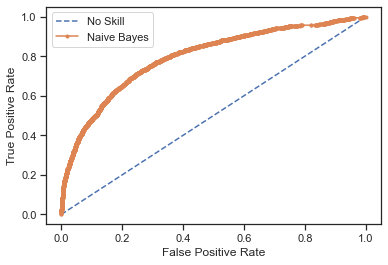

In [29]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [30]:
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
i=np.argmax(gmeans) ## Index with maximum geometric mean will be index of best threshold value

In [31]:
predicted_v2 = (yhat >=thresholds[i]).astype('int') ## Prediction of classifier using best threshold

In [32]:
## Confusion Matrix with best threshold value
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_v2)
cm
df_cm = pd.DataFrame(cm)
df_cm

0     1
0  10128  3372
1    431  1069

In [82]:
## Recall score using best threshold values
recall_score(y_test, predicted_v2)

0.7126666666666667

We can play around various threshold values. For instance, taking the value of threshold less than 0.5 will increase our recall values. But at the same time it will increase the False positive values also. We have to do trade off here

In [33]:
predicted_v3 = (yhat >=0.3).astype('int')

In [34]:
## Confusion Matrix with threshold value as 0.3
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_v3)
cm
df_cm = pd.DataFrame(cm)
df_cm

0     1
0  8283  5217
1   272  1228

In [35]:
## Recall score using threshold value as 0.3
recall_score(y_test, predicted_v3) 

0.8186666666666667

 High Recall means we are classifying Electronic tags better but at the same time misclassification of Not Electronics classes increses. This is evident from the Confusion matrix above

# Final Comments:



1. No model is a perfect model!! There are still scopes to improve this model(by hyperparameter tuning etc) or choosing some other models
2. Model evaluation obatained above may not robust. We need to perform different experiment to validate the model performance
3. Further scopes: We can perform K fold validation techniques, Bootstrapping techniques. These method will help in validation of our model performance.